## Inspired by this [guide](http://joshvarty.github.io/AlphaZero/).

In [1]:
from connect2 import Connect2
from connect4 import Connect4
from mcts import MCTS
from model import Model
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
model = Model((Connect4.ROWS, Connect4.COLUMNS, 2), Connect4.COLUMNS, summary=True)

2021-11-28 18:37:25.881661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 18:37:26.058412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 18:37:26.058703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 7, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 4, 5, 10)     190         ['input_1[0][0]']                
                                                                                                  
 re_lu (ReLU)                   (None, 4, 5, 10)     0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 4, 5, 10)     110         ['re_lu[0][0]']                  
                                                                                              

2021-11-28 18:37:26.061766: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-28 18:37:26.063086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 18:37:26.063409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 18:37:26.063830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [3]:
model.train(Connect4(), nb_iter=10, nb_simulations=100, nb_games=20, nb_epochs=10)
model.save("model.h5")

1/10...

2021-11-28 18:37:30.123146: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


Done
policy_accuracy:  0.47 value_mse:  0.71
2/10...Done
policy_accuracy:  0.31 value_mse:  0.50
3/10...Done
policy_accuracy:  0.39 value_mse:  0.55
4/10...Done
policy_accuracy:  0.50 value_mse:  0.44
5/10...Done
policy_accuracy:  0.42 value_mse:  0.22
6/10...Done
policy_accuracy:  0.52 value_mse:  0.38
7/10...Done
policy_accuracy:  0.54 value_mse:  0.32
8/10...Done
policy_accuracy:  0.67 value_mse:  0.50
9/10...Done
policy_accuracy:  0.63 value_mse:  0.48
10/10...Done
policy_accuracy:  0.54 value_mse:  0.45


/home/gaetan/.local/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [4]:
model.predict(Connect4.get_init_state())

(array([5.4992240e-02, 1.7000915e-02, 4.7280814e-02, 8.6365116e-01,
        1.9019468e-03, 2.8046305e-04, 1.4892448e-02], dtype=float32),
 0.04592578)

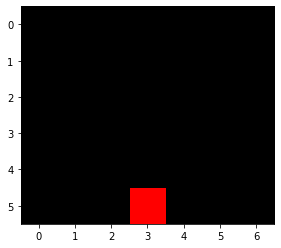

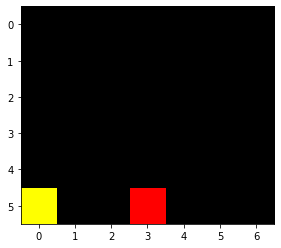

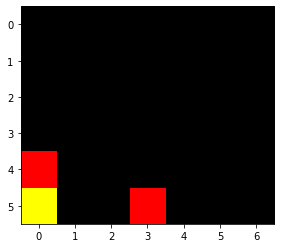

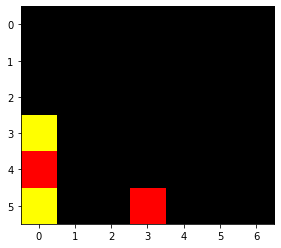

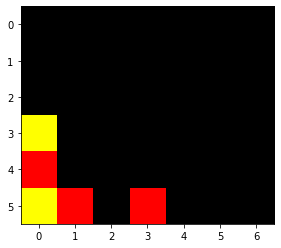

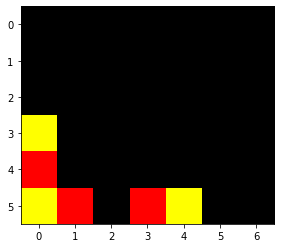

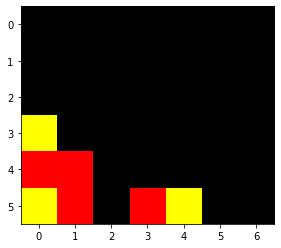

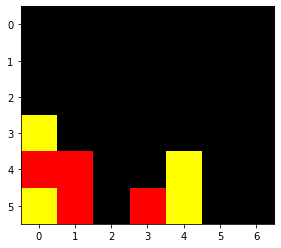

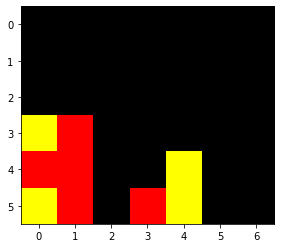

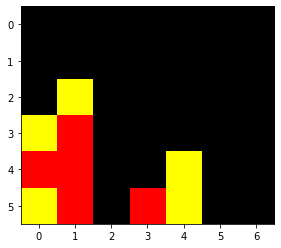

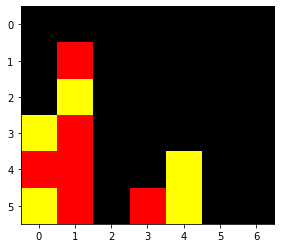

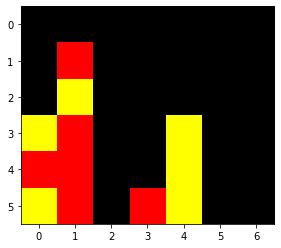

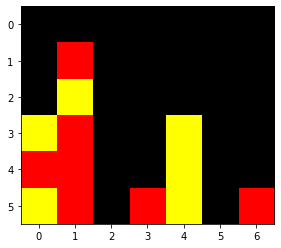

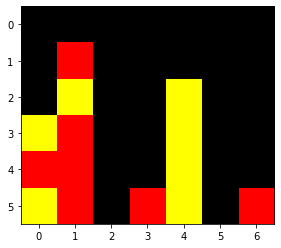

In [5]:
state = Connect4().get_init_state()
Connect4().play_vs(model, state, 50)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 6, 7, 2)]    0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 4, 5, 10)     190         ['input_3[0][0]']                
                                                                                                  
 re_lu_6 (ReLU)                 (None, 4, 5, 10)     0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 4, 5, 10)     110         ['re_lu_6[0][0]']                
                                                                                            

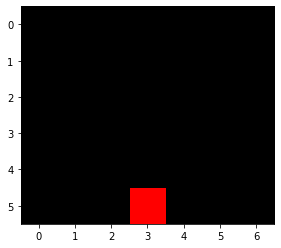

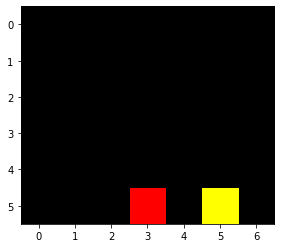

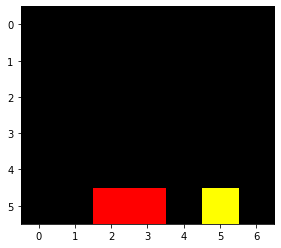

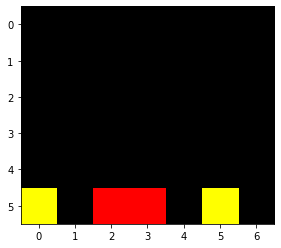

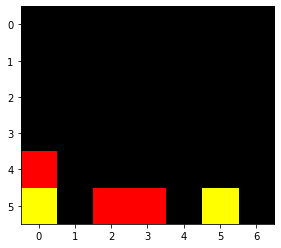

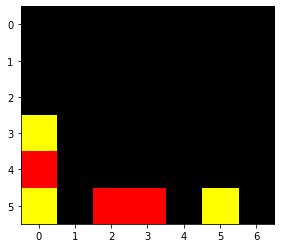

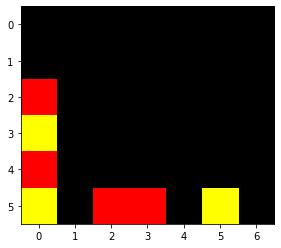

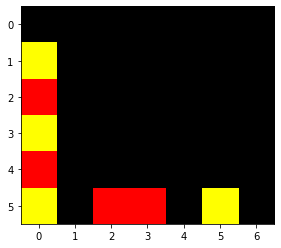

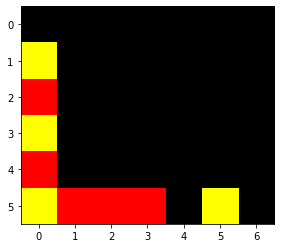

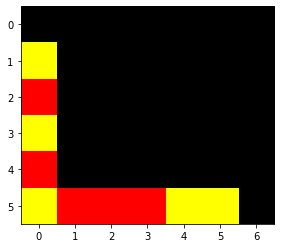

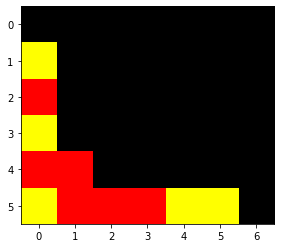

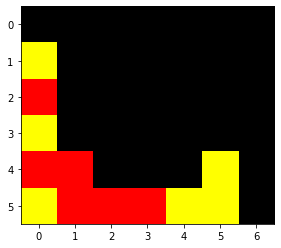

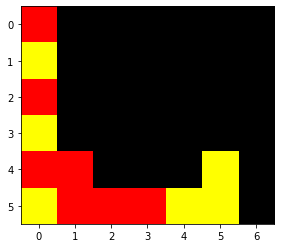

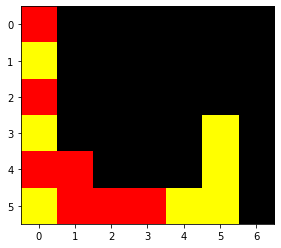

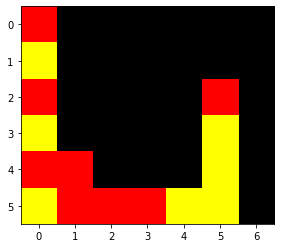

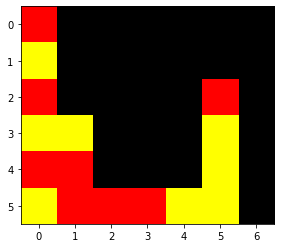

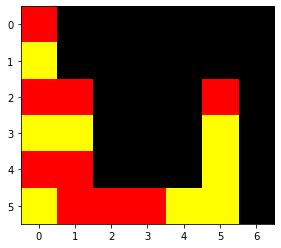

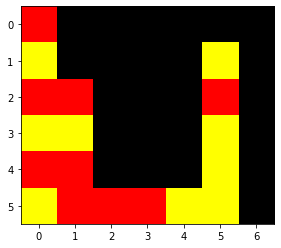

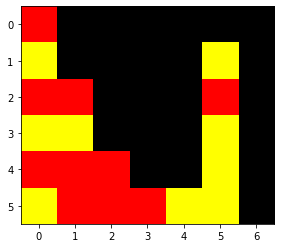

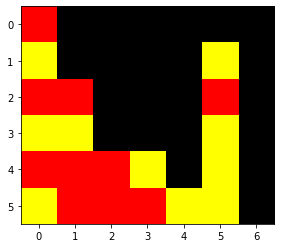

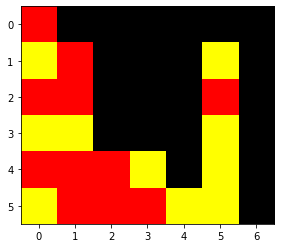

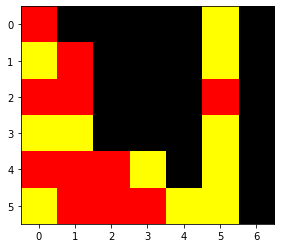

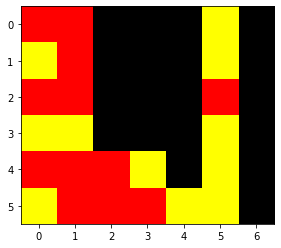

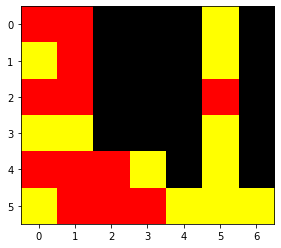

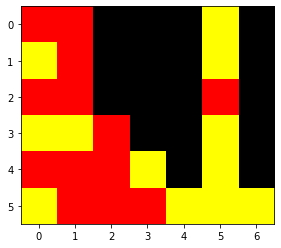

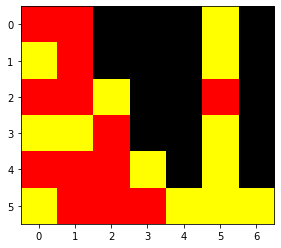

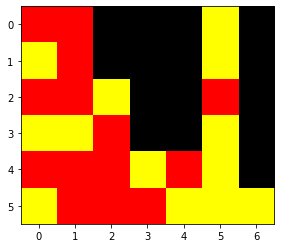

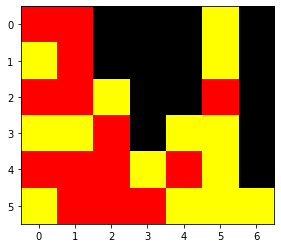

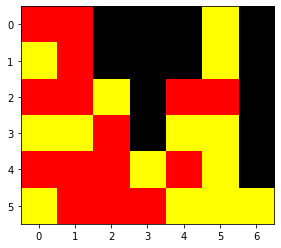

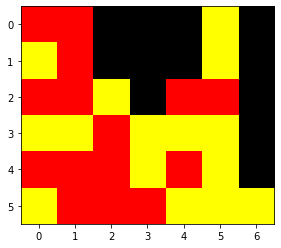

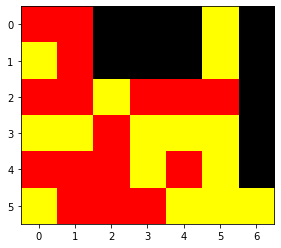

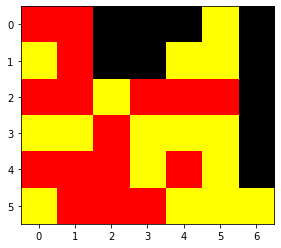

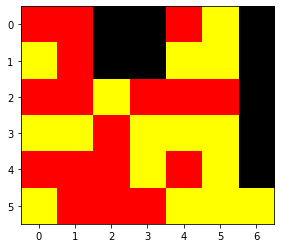

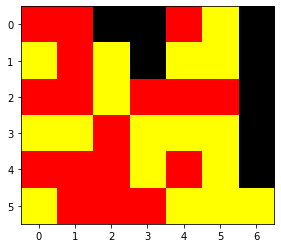

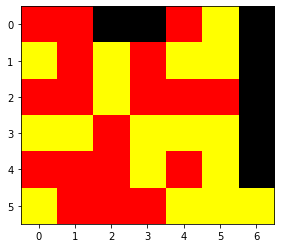

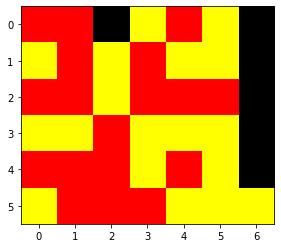

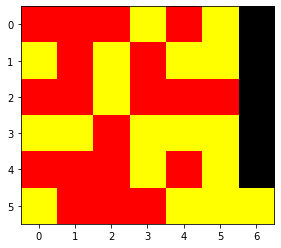

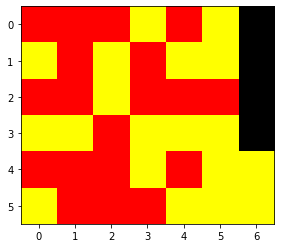

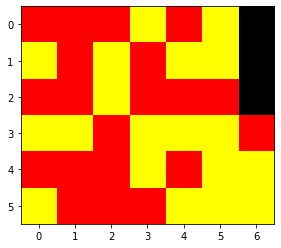

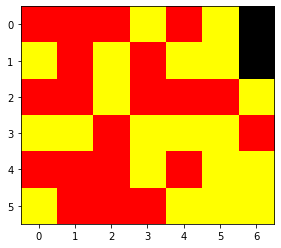

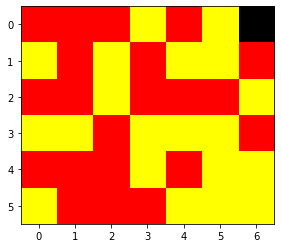

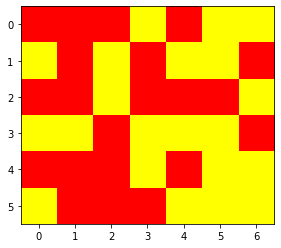

In [7]:
import time

model2 = Model((Connect4.ROWS, Connect4.COLUMNS, 2), Connect4.COLUMNS, summary=True)
state = Connect4.get_init_state()
while Connect4().get_reward(state) is None:
  mcts1 = MCTS(Connect4(), state, model, 100)
  state = mcts1.run().select_child().state
  plt.imshow(Connect4().colorize_state(state))
  plt.show()
  time.sleep(1)
  if Connect4().get_reward(state):
    break
  mcts2 = MCTS(Connect4(), state, model2, 100)
  state = mcts2.run().select_child().state
  plt.imshow(Connect4().colorize_state(state))
  plt.show()
  time.sleep(1)
  if Connect4().get_reward(state):
    break